In [1]:
# Enabling the `widget` backend.
# This requires jupyter-matplotlib a.k.a. ipympl.
# ipympl can be install via pip or conda.
# https://github.com/matplotlib/ipympl
%matplotlib widget

import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import axes3d



Bad key text.latex.unicode in file /home/chavlin/.pyenv/versions/3.8.0/envs/sandbox/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 112 ('text.latex.unicode : False # use "ucs" and "inputenc" LaTeX packages for handling')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key savefig.frameon in file /home/chavlin/.pyenv/versions/3.8.0/envs/sandbox/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 423 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.1/matplotlibrc.template
or from the matplotlib source distribution

Bad key pgf.debug in file /home/chavlin/.pyenv/versions/3.8.0/envs/sandbox/lib/python3.8/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 444 ('pgf.debug         

In [2]:
def sphere_to_cart(r, phi, theta):
    # phi is the polar (0 to 2pi) angle, theta is azimuthal (0 to pi) angle
    x = r * np.cos(phi)*np.sin(theta)
    y = r * np.sin(phi)*np.sin(theta)
    z = r * np.cos(theta)
    return x, y, z

def get_cone(theta, max_r=1., n_phi=20, n_r = 10):
    phi, r = np.meshgrid(np.linspace(0,2*np.pi, n_phi), np.linspace(0, max_r, n_r))
    return sphere_to_cart(r, phi, theta)

def get_sphere(r, n_phi=20, n_theta=10):
    phi, theta = np.meshgrid(np.linspace(0,2*np.pi, n_phi), np.linspace(0, np.pi, n_theta))
    return sphere_to_cart(r, phi, theta)

def get_plane(phi, x_max = 1, z_max = 1, n_x = 10, n_z = 10):
    # a plane containing the given point and the unit-normal in z
    
    # plane is normal to z, so z can be anything. pick z and y calculate x    
    z, x = np.meshgrid(np.linspace(-x_max, x_max, n_x), np.linspace(-z_max, z_max, n_z))    
    if np.abs(phi - np.pi/2) > 1e-4:        
        y = x * np.tan(phi)
    else:
        # y can also be anything as phi approaches pi/2
        y = x
            
    return x, y, z
    

In [21]:
theta_1 = 20 * np.pi/180
theta_2 = 45 * np.pi/180
r_1 = 1.
r_2 = 2. 
phi_1 = 15 * np.pi/180
phi_2 = 40 * np.pi/180

cone = get_cone(theta_1, max_r = 2)
cone2 = get_cone(theta_2, max_r = 2)
sp = get_sphere(r_1)
sp2 = get_sphere(r_2, n_phi=30, n_theta=25)

# set points to define plane (r, theta, phi)
plane = get_plane(phi_1, x_max = 2, z_max=2)
plane2 = get_plane(phi_2, x_max = 2, z_max=2)

# the points defining our volume

points = [sphere_to_cart(r_1, phi_1, theta_1,),
          sphere_to_cart(r_2, phi_1, theta_1),
          sphere_to_cart(r_2, phi_1, theta_2),
          sphere_to_cart(r_1, phi_1, theta_2),
          sphere_to_cart(r_1, phi_2, theta_1),
          sphere_to_cart(r_2, phi_2, theta_1),
          sphere_to_cart(r_2, phi_2, theta_2),
          sphere_to_cart(r_1, phi_2, theta_2),]
points = np.array(points)

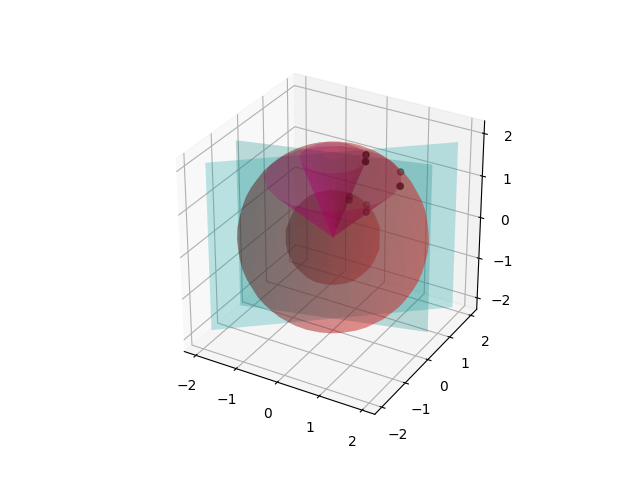

In [22]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_box_aspect([1,1,1])


ax.plot_surface(*cone, color=(1., 0, 1.0, 0.25))
ax.plot_surface(*cone2, color=(1., 0, 1.0, 0.25))
ax.plot_surface(*sp, color=(1., 0, 0, 0.25))
ax.plot_surface(*sp2, color=(1., 0, 0, 0.25))
ax.plot_surface(*plane, color=(0., 1., 1.0, 0.25))
ax.plot_surface(*plane2, color=(0., 1., 1.0, 0.25))
ax.scatter(points[:,0], points[:,1], points[:,2], color=(0., 0., .0, 1.))
plt.show()